# ZADANIE 1

In [1]:
import pandas as pd

df = pd.DataFrame({'Value': [x for x in range(1,7)], 'Probability': [1/6 for x in range(1,7)]})
df

,Value,Probability
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


# ZADANIE 2

In [2]:
import numpy as np

# Generuj próbki z rozkładu Bernoulliego
bernoulli_samples = np.random.choice(df['Value'], 100, p=df['Probability'])

# Generuj próbki z rozkładu dwumianowego
binomial_samples = np.random.binomial(n=1, p=df['Probability'].values[0], size=100)

# Generuj próbki z rozkładu Poissona
poisson_samples = np.random.poisson(lam=np.sum(df['Value'] * df['Probability']), size=100)

# Wyświetl wyniki
print(f"Bernoulli Samples:\n{bernoulli_samples}")
print(f"\nBinomial Samples:\n{binomial_samples}")
print(f"\nPoisson Samples:\n{poisson_samples}")

Bernoulli Samples:
[4 2 5 6 5 1 5 5 4 5 4 5 5 1 2 3 1 5 6 1 6 2 6 5 4 2 3 5 5 1 5 4 5 3 5 5 4
 5 1 5 4 3 2 1 1 2 4 1 1 5 5 1 2 1 2 2 2 3 2 2 4 3 6 2 5 5 1 6 1 2 2 2 1 2
 5 4 5 6 4 6 6 3 1 2 2 5 6 1 3 5 6 1 2 2 3 3 5 4 3 1]

Binomial Samples:
[1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]

Poisson Samples:
[5 6 2 6 4 5 4 3 4 5 4 2 3 4 3 2 5 4 2 6 2 3 6 4 2 3 2 2 3 3 4 3 5 2 3 6 2
 3 1 5 3 3 2 9 1 1 2 1 3 2 4 2 3 4 3 2 5 4 2 0 5 4 2 6 4 5 1 2 6 3 6 6 5 5
 2 3 3 3 1 3 3 2 4 5 2 5 4 5 4 3 4 5 5 5 5 3 3 4 0 4]


# ZADANIE 3

In [3]:
from scipy.stats import describe, kurtosis, skew

def calculate_statistics(samples, distribution_name):
    print(f"\nStatistics for {distribution_name} Samples:")
    stats = describe(samples)
    print("Mean:", stats.mean)
    print("Variance:", stats.variance)
    print("Kurtosis:", kurtosis(samples))
    print("Skewness:", skew(samples))

calculate_statistics(bernoulli_samples, "Bernoulli")
calculate_statistics(binomial_samples, "Binomial")
calculate_statistics(poisson_samples, "Poisson")


Statistics for Bernoulli Samples:
Mean: 3.38
Variance: 3.005656565656566
Kurtosis: -1.4355649094239098
Skewness: -0.001374664593966658

Statistics for Binomial Samples:
Mean: 0.18
Variance: 0.14909090909090916
Kurtosis: 0.7750677506775063
Skewness: 1.6658534601451305

Statistics for Poisson Samples:
Mean: 3.49
Variance: 2.494848484848485
Kurtosis: 0.28841751468932264
Skewness: 0.3198614849709802


# ZADANIE 4

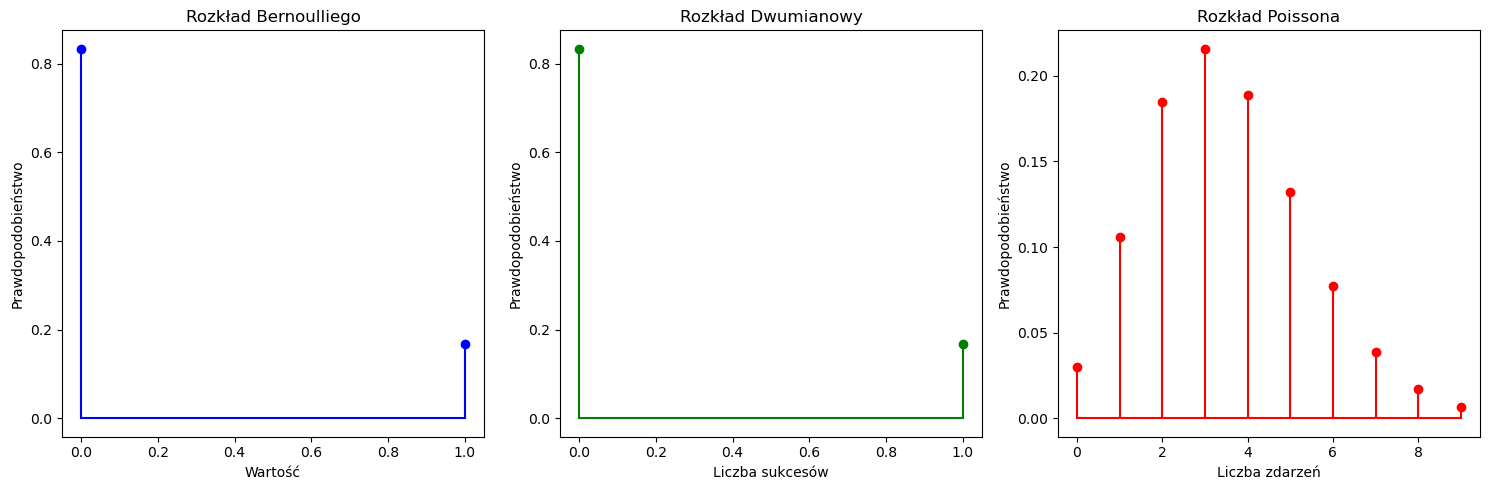

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson

# Funkcje generujące rozkłady prawdopodobieństwa
bernoulli_dist = bernoulli(p=df['Probability'].values[0])
binomial_dist = binom(n=1, p=df['Probability'].values[0])
poisson_dist = poisson(mu=np.sum(df['Value'] * df['Probability']))

# Wygeneruj punkty do narysowania rozkładów prawdopodobieństwa
x_bernoulli = np.linspace(0, 1, 2)
x_binomial = np.arange(0, 2)
x_poisson = np.arange(0, 10)

# Wykresy rozkładów prawdopodobieństwa
plt.figure(figsize=(15, 5))

# Rozkład Bernoulliego
plt.subplot(1, 3, 1)
plt.stem(x_bernoulli, bernoulli_dist.pmf(x_bernoulli), basefmt='b-', markerfmt='bo', linefmt='b-')
plt.title('Rozkład Bernoulliego')
plt.xlabel('Wartość')
plt.ylabel('Prawdopodobieństwo')

# Rozkład dwumianowy
plt.subplot(1, 3, 2)
plt.stem(x_binomial, binomial_dist.pmf(x_binomial), basefmt='g-', markerfmt='go', linefmt='g-')
plt.title('Rozkład Dwumianowy')
plt.xlabel('Liczba sukcesów')
plt.ylabel('Prawdopodobieństwo')

# Rozkład Poissona
plt.subplot(1, 3, 3)
plt.stem(x_poisson, poisson_dist.pmf(x_poisson), basefmt='r-', markerfmt='ro', linefmt='r-')
plt.title('Rozkład Poissona')
plt.xlabel('Liczba zdarzeń')
plt.ylabel('Prawdopodobieństwo')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()